## `Task` Do feature selection as per metods taught is session 54 on SECOM dataset.

Dataset Link : https://archive.ics.uci.edu/ml/datasets/SECOM

Drive Link : https://docs.google.com/spreadsheets/d/1dFCe1zgokabsiEr6BbWmMJtiMefkrChpJWLiG_0dDkk/edit?usp=share_link

In [132]:
# Write your Code here

### `Solution`

In [186]:
import pandas as pd
import numpy as np
df = pd.read_csv("uci-secom - uci-secom.csv")
df.drop(columns=['Time'],inplace=True)
df.sample(5)


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1318,3212.70,2472.92,2210.8556,1665.0062,2.4475,100.0,97.1056,0.1227,1.5757,-0.0037,...,35.5800,0.4986,0.0126,0.0036,2.5244,0.0382,0.0136,0.0044,35.5800,-1
594,3042.70,2355.11,2242.8555,1430.7270,0.8832,100.0,106.2100,0.1216,1.4817,0.0030,...,NaN,0.4937,0.0153,0.0034,3.0907,0.0256,0.0189,0.0060,73.8657,-1
725,NaN,2608.11,2216.5111,871.2526,1.2366,100.0,107.4867,0.1194,1.4968,0.0063,...,85.1551,0.5003,0.0142,0.0035,2.8292,0.0131,0.0112,0.0035,85.1551,-1
14,2963.97,2629.48,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.4474,0.0144,...,142.9080,0.5077,0.0094,0.0026,1.8483,0.0202,0.0289,0.0084,142.9080,1
470,2929.84,2504.50,2183.3111,1588.5090,1.6269,100.0,102.8467,0.1248,1.5545,-0.0370,...,NaN,0.4985,0.0150,0.0045,3.0151,0.0193,0.0122,0.0040,63.0838,-1


In [187]:
df.shape

(1567, 591)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Pass/Fail
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


<Axes: >

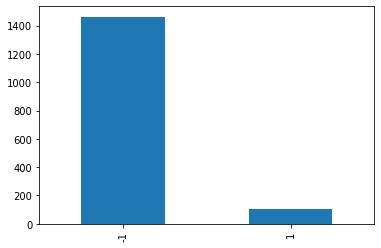

In [189]:
df['Pass/Fail'].value_counts().plot(kind='bar')

In [190]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove Duplicates

In [191]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns


In [192]:
duplicated_columns = get_duplicate_columns(df)
duplicated_columns = set(duplicated_columns)

In [193]:
duplicated_columns

{'13', '141', '178', '190', '256', '52', '97'}

In [194]:
x_train.drop(columns=list(duplicated_columns),inplace=True)
x_test.drop(columns=list(duplicated_columns),inplace=True)

In [195]:
print(x_test.shape)
print(x_train.shape)

(314, 583)
(1253, 583)


In [196]:
from sklearn.feature_selection import VarianceThreshold,fclassifier,SelectKBestS

In [197]:
selector = VarianceThreshold(threshold = 0.05)

In [181]:
columns = x_train.columns[selector.get_support()]
columns

NotFittedError: This VarianceThreshold instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [201]:
selector.fit(x_train)

VarianceThreshold(threshold=0.05)

In [204]:
x_train.columns[selector.get_support()]

Index(['0', '1', '2', '3', '4', '6', '12', '14', '15', '16',
       ...
       '570', '571', '572', '573', '574', '576', '577', '581', '585', '589'],
      dtype='object', length=287)

In [206]:
x_train = pd.DataFrame(selector.transform(x_train))
x_test = pd.DataFrame(selector.transform(x_test))

In [229]:
from scipy.stats import pearsonr 

cols_to_remove = []
for col in x_train.columns:
    #print(pearsonr(x_train[col],y_train))
    p_val = np.corrcoef(x_train[col],y_train)[1,1]
    print(p_val)
    

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
from sklearn

0        5
1        3
2       14
3       14
4       14
      ... 
282      0
283      0
284    760
285      1
286      1
Length: 287, dtype: int64